## Pacotes Utilizados:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

## Hiperplano linear de separação para classificação binária

A classificação binária consiste na separação de dados entre duas classes utilizando um hiperplano no espaço formado pela características dos dados. Para observar como essa separação pode ser feita utilizando machine learning, dois algoritmos de classificação linear serão utilizados:

1. Algoritmo do Perceptron de Rosemblat
1. Máquina de Vetor de Suporte Linear

Os dados pertencentes ao conjunto de treinamento possuem três características e são dispostos abaixo:

Classe 1 | Classe 2
--------- | ---------
(0, 0, 0) | (0, 0, 1)
(1, 0, 0) | (0, 1, 1)
(1, 0, 1) | (0, 1, 0)
(1, 1, 0) | (1, 1, 1)



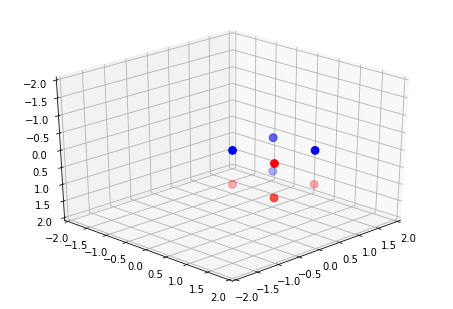

In [11]:
data_q1_a = np.array([[0, 0, 0],
                [1, 0, 0],
                [1, 0, 1],
                [1, 1, 0],
                [0, 0, 1],
                [0, 1, 1],
                [0, 1, 0],
                [1, 1, 1]])
classes_q1_a = np.array([0, 0, 0, 0, 1, 1, 1, 1])

from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-45)
ax.set_zlim(bottom= -2, top=2)
ax.set_xlim(left= -2, right=2)
ax.set_ylim(bottom= -2, top=2)
mask = classes_q1_a == 0
ax.scatter(data_q1_a[mask, 0], data_q1_a[mask, 1], data_q1_a[mask, 2], c='b', s=60)
ax.scatter(data_q1_a[~mask, 0], data_q1_a[~mask, 1], data_q1_a[~mask, 2], c='r', s=60)

É possível observar que os dados formam um cubo no espaço tridimensional e é possível separá-los com um plano atravessando suas arestas.

Para criar o plano de separação serão utilizadas as classes [Perceptron](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html#sklearn.linear_model.Perceptron) e [SVR](http://scikit-learn.org/stable/modules/svm.html) da biblioteca scikit-learn.

In [3]:
from sklearn.linear_model import Perceptron
from sklearn.svm import LinearSVC

## O perceptron de rosemblat

O perceptron de rosemblat busca encontrar um plano de divisão dos dados de acordo com a formula:

\begin{equation}
    x \in \omega_{1}(\omega_{2}), \quad \textrm{se} \quad W^T \cdot x > 0 (< 0)
\end{equation}

Em que W é o vetor de pesos para cada característica e x é o vetor de características (valores do dado), resultando em uma equação de forma:

\begin{equation}
    W[0] \cdot x[0] + W[1] \cdot x[1] + W[2] \cdot x[2] + b = 0
\end{equation}

Ou seja, os pontos cujos valores sejam positivos ao serem aplicados no peso, serão considerados pertencente a uma classe e a outra caso sejam negativos

Na biblioteca scikit, os coeficientes (W) do hiperplano de separação são guardados no atributo coef_ do modelo utilizado, enquanto a interseção (b) do subespaço formado pelas características é guardado em 

/home/eduardo/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


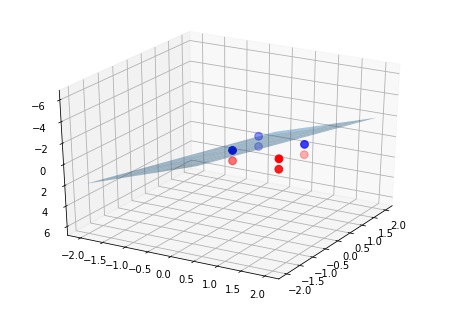

In [26]:
perceptron_q1 = Perceptron().fit(data_q1_a, classes_q1_a)
coefs_q1, intercept_q1 = perceptron_q1.coef_.ravel(), perceptron_q1.intercept_

figure = plt.figure()
axis = Axes3D(figure, elev=-152, azim=-30)

xp = np.linspace(-2, 2, 50)
yp = np.linspace(-2, 2, 50)

XP, YP = np.meshgrid(xp, yp)
ZP = (coefs_q1[0] * XP + coefs_q1[1] * YP + intercept_q1) / -coefs_q1[2]

axis.plot_surface(XP, YP, ZP, rstride=9, cstride=9, alpha=0.4)
axis.scatter(data_q1_a[mask, 0], data_q1_a[mask, 1], data_q1_a[mask, 2], c='b', s=60)
axis.scatter(data_q1_a[~mask, 0], data_q1_a[~mask, 1], data_q1_a[~mask, 2], c='r', s=60)

## A Máquina de Vetor de Suporte

A máquina de vetor de suporte atua de forma diferente do Perceptron de Rosemblat, mas também gera um hiperplano caso sua função de kernel seja linear. Ela busca encontrar um plano de divisão ótimo entre as classes levando em consideração alguns pontos de cada classe, chamados de vetores de suporte, para gerar a maior margem possível entre as classes.


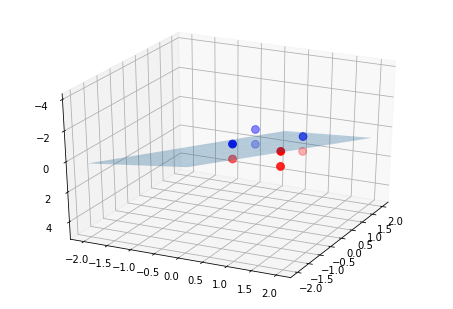

In [16]:
svm_linear = LinearSVC().fit(data_q1_a, classes_q1_a)
coefs_q1_a, intercept_q1_a = svm_linear.coef_.ravel(), svm_linear.intercept_

# Obtem uma figura para plotagem
figure = plt.figure()
axis = Axes3D(figure, elev=-152, azim=-26)

# Cria um vetor com valores linearmente espaçados em [-2, 2]
xx = np.linspace(-2, 2, 50)
yy = np.linspace(-2, 2, 50)

# 
XX, YY = np.meshgrid(xx, yy)
ZZ = (coefs_q1_a[0] * XX + coefs_q1_a[1] * YY + intercept_q1_a) / -coefs_q1_a[2]

# Plota a superficie e os pontos em cada classe (azul = classe 1, vermelho = classe 2)
axis.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
axis.scatter(data_q1_a[mask, 0], data_q1_a[mask, 1], data_q1_a[mask, 2], c='b', s=60)
axis.scatter(data_q1_a[~mask, 0], data_q1_a[~mask, 1], data_q1_a[~mask, 2], c='r', s=60)

## Analise de convergência utilizando Rede Neurais

    As redes neurais possuem diversos tipos de algoritmos de convergência

In [5]:
def logic(sample):
    return sample[0] ^ sample[1]^ sample[2]

def func(x):
    num = np.cos(2.0 * np.pi * x) * np.sen(np.pi * x)
    div = (1 - (4.0 * x) ** 2.0) * np.pi * x
    return num / div

def func2(vec):
    return vec[0] ** 2 + vec[1] ** 2 + 2 * vec[0] * vec[1] * np.cos(np.pi * vec[0] * vec[1]) + vec[0] + vec[1] - 1 

def erro_medio(predicao, atual):
    erros = [y_p - y for y_p, y in zip(predicao, atual)]
    return sum(erros) / len(erros)

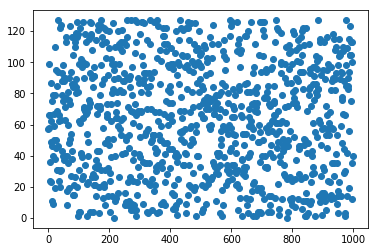

array([[12, 42, 31],
       [91, 58, 35],
       [71, 57, 29],
       ...,
       [64, 98,  1],
       [30, 38, 52],
       [28, 22, 34]])

In [6]:
data = np.random.randint(0, 100, size=(1000, 3))
target = np.apply_along_axis(logic, axis=1, arr=data)
plt.scatter(range(len(target)), target, marker='o')
plt.show()
display(data)

In [7]:
momento = 0.5
act_fn = "tanh"
X_train, X_test, y_train, y_test = train_test_split(data, target) 
clf = MLPRegressor(activation=act_fn, learning_rate="constant", learning_rate_init=momento)

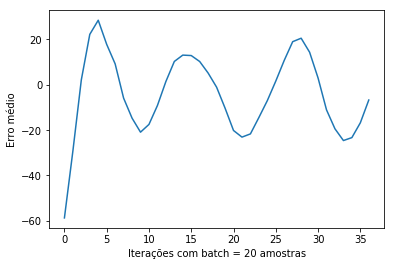

In [8]:
errors = []
for batch in range(20, X_train.shape[0], 20):
    endbatch = X_train.shape[0] if batch > X_train.shape[0] else batch
    X_batch = X_train[batch-20: endbatch]
    y_batch = y_train[batch-20: endbatch]
    alldata = np.append(X_batch, y_batch.reshape((len(y_batch), 1)), axis=1) 
    np.random.shuffle(alldata)
    clf.partial_fit(alldata[:, :-1], alldata[:, -1])
    predicao = clf.predict(X_test)
    errors.append(erro_medio(predicao, target))
plt.ylabel("Erro médio")
plt.xlabel("Iterações com batch = 20 amostras")
plt.plot(range(len(errors)), errors)
plt.show()